In [26]:
# Imports and getting the Strings of the "Training" Folder
from matplotlib.image import imread
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops
import cv2

training_data = os.listdir('./Training')

In [27]:
# Function to trim the whitespace of images
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [28]:
# Get all the pictures in a single variable

tour = []
kid = []
ebike = []
mountain = []
race = []
timetrial = []
unicycle = []


for i in range(len(training_data)):
    image = Image.open(f'./Training/{training_data[i]}')
    image_cropped = trim(image)
    
    image_array = np.array(image_cropped)
    
    # Convert colored array to grayscale
    grey_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
    
    if "tour" in training_data[i]:
        tour.append(grey_image)
        
    if "kid" in training_data[i]:
        kid.append(grey_image)
    
    if "ebike" in training_data[i]:
        ebike.append(grey_image)
    
    if "mountain" in training_data[i]:
        mountain.append(grey_image)
        
    if "race" in training_data[i]:
        race.append(grey_image)
    
    if "timetrial" in training_data[i]:
        timetrial.append(grey_image)
    
    if "unicycle" in training_data[i]:
        image = Image.open(f'./Training/{training_data[i]}')
        rotate_image = image.rotate(90, expand=True)
        image_cropped = trim(rotate_image)
        image_array = np.array(image_cropped)
        # Convert colored array to grayscale
        grey_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
        
        unicycle.append(grey_image)
    
    
print("Count of unicycles: ", len(unicycle))
print("Count of tour bikes: ", len(tour))
print("Count of Kid bikes: ", len(kid))
print("Count of ebikes: ", len(ebike))
print("Count of mountains: ", len(mountain))
print("Count of race bikes: ", len(race))
print("Count of timetrial: ", len(timetrial))

Count of unicycles:  75
Count of tour bikes:  50
Count of Kid bikes:  41
Count of ebikes:  99
Count of mountains:  40
Count of race bikes:  45
Count of timetrial:  45


In [29]:
# Turning lists to array to have it easier
tour_array = np.array(tour)
kid_array = np.array(kid)
ebike_array = np.array(ebike)
mountain_array = np.array(mountain)
race_array = np.array(race)
timetrial_array = np.array(timetrial)
unicycle_array = np.array(unicycle)

In [30]:
# Normalizing the arrays
tour_array / 255.0
kid_array / 255.0
ebike_array / 255.0
mountain_array / 255.0
race_array / 255.0
timetrial_array / 255.0
unicycle_array / 255.0

array([array([[0.99215686, 0.99215686, 0.98823529, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.98823529, 0.98823529, 0.98823529, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.98823529, 0.98823529, 0.98823529, ..., 0.99215686, 0.99215686,
        0.99215686],
       ...,
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686]]),
       array([[1.        , 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [1.        , 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [1.        , 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.99607843, 0.99607843, 0.99607843, ..., 1.        , 1.        ,
        1.        ],
       [0.99607843, 

In [32]:
# Function to get the max size of an image array
def get_max_size(array):
    max_height = 0 
    max_width = 0

    min_height = 1000000000
    min_width = 1000000000

    for i in range(len(array)):
        if array[i].shape[0] > max_height:
            max_height = array[i].shape[0]

        if array[i].shape[1] > max_width:
            max_width = array[i].shape[1]

        if array[i].shape[0] < min_height:
            min_height = array[i].shape[0]

        if array[i].shape[1] < min_width:
            min_width = array[i].shape[1]
    
    return {"max_height": max_height, "max_width": max_width, "min_height": min_height, "min_width": min_width}

In [33]:
# function to resize images 
def resize_image_array(array):
    resized_list = []
    
    for i in range(len(array)):
        resize_image = cv2.resize(array[i], dsize=(400, 248), interpolation=cv2.INTER_AREA)
        resized_list.append(resize_image)
    
    resized_array = np.array(resized_list)
    
    return resized_array        

In [34]:
# Resize the image arrays
tour_array_resized = resize_image_array(tour_array)
kid_array_resized = resize_image_array(kid_array)
ebike_array_resized = resize_image_array(ebike_array)
mountain_array_resized = resize_image_array(mountain_array)
race_array_resized = resize_image_array(race_array)
timetrial_array_resized = resize_image_array(timetrial)
unicycle_array_resized = resize_image_array(unicycle_array)

In [35]:
# Create average Images for every class

average_tour = np.average(tour_array_resized, axis=0)
average_kid = np.average(kid_array_resized, axis=0)
average_ebike = np.average(ebike_array_resized, axis=0)
average_mountain = np.average(mountain_array_resized, axis=0)
average_race = np.average(race_array_resized, axis=0)
average_timetrial = np.average(timetrial_array_resized, axis=0)
average_unicycle = np.average(unicycle_array_resized, axis=0)

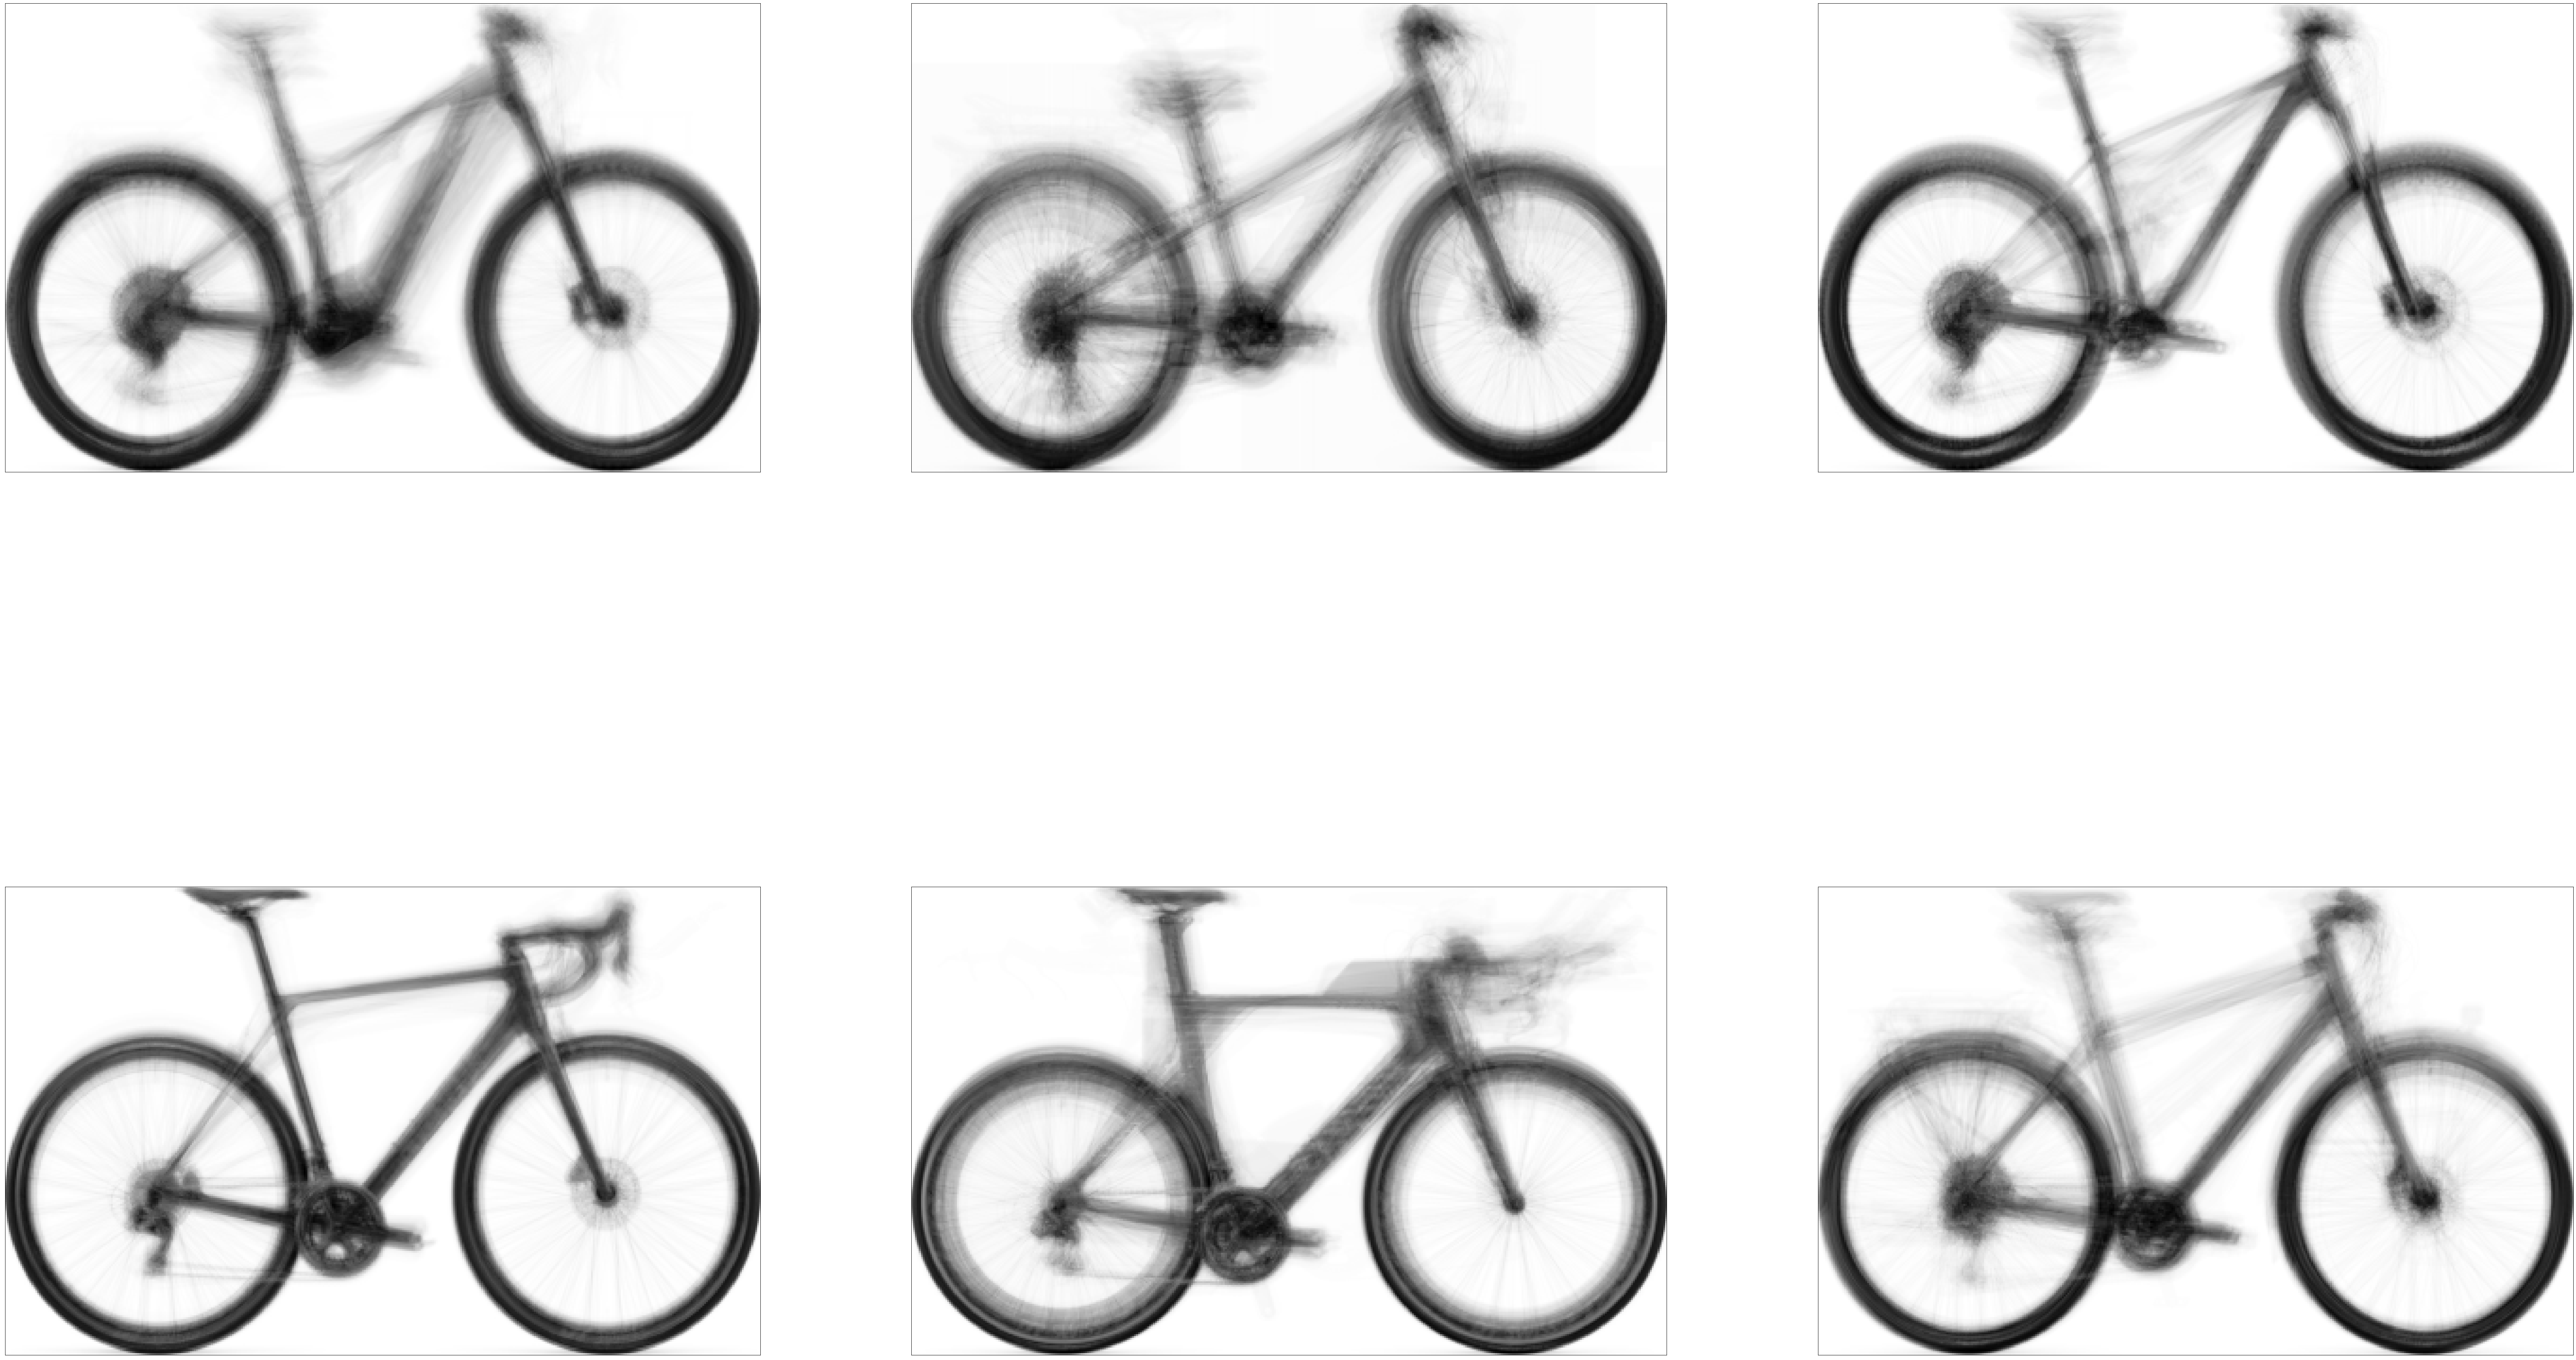

In [36]:
# The Images below show the average Bikes we need want to see
images_list = [average_ebike, average_kid, average_mountain, average_race, average_timetrial, average_tour]

plt.figure(figsize=(100,100))
for i in range(len(images_list)):
    plt.subplot(3,3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_list[i], cmap='Greys_r')
plt.show()

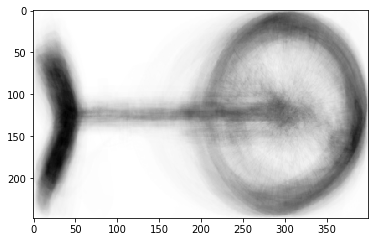

In [37]:
# show the average unicycle
plt.imshow(average_unicycle, cmap='Greys_r')